<a href="https://colab.research.google.com/github/raymond98tan/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Raymond_Tan_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [1]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv

--2020-08-12 19:30:03--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv’

bootcampers.csv     100%[===================>]   2.38M  11.9MB/s    in 0.2s    

2020-08-12 19:30:03 (11.9 MB/s) - ‘bootcampers.csv’ saved [2499384/2499384]



In [3]:
df = pd.read_csv('bootcampers.csv')

df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [5]:
sample = df.sample(20, random_state=42)
sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [6]:
print(sample['ConvertedSalary'].mean())
print(sample2['ConvertedSalary'].mean())

55752.2
68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

<font color=red>I trust the sample mean of 68551.25 more because it is taken from a larger sample size. From a non-techical audience standpooint, I believe they would at least know that having more data produces more accurate results leading to them trusting the larger sample size as well.</font>

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

<font color=red>No, just having the point estimate doesn't indicate the sampling error within these estimates since you don't have a value to compare it to.</font>

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



<font color=red>When reporting about how far off our estimates might be due to sampling error, we could also report the standard error, confidence interval, and sample variance. With non-technical readers, it may be helpful to graphpically show them as well.</font> 

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [7]:
def confidence_interval(sample, confidence_level=.95):
  # make sure we're working with a numpy array
  sample = np.array(sample)
  # sample mean
  x_bar = np.mean(sample)
  # SAMPLE standard deviation EXTRA PARAMETER!
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic for our confidence level %
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)

  std_err = s / np.sqrt(n)

  moe = t * std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [10]:
CI1 = confidence_interval(sample['ConvertedSalary'])

CI1

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [12]:
CI2 = confidence_interval(sample2['ConvertedSalary'])

CI2

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

<font color=red>The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.</font>

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [15]:
# Mean and Margin of Error for smaller sample

print(CI1[1])

print(CI1[3])

55752.2
19947.096903744638


In [16]:
# Mean and Margin of Error for larger sample

print(CI2[1])

print(CI2[3])

68551.255
7958.196195520917


<font color=red>The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).</font>

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

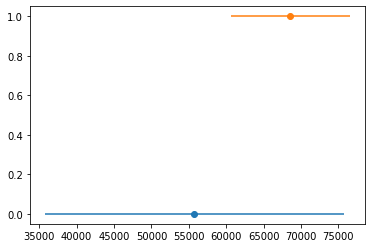

In [17]:
plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')
plt.errorbar(x=CI2[1], y=1, xerr=CI2[3], fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

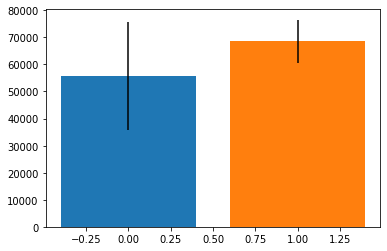

In [18]:
plt.bar(x=0, height=CI1[1], yerr=CI1[3])
plt.bar(x=1, height=CI2[1], yerr=CI2[3])
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [20]:
CI3 = confidence_interval(df['ConvertedSalary'])

CI3

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

<font color=red>Seeing that the spread of bounds has become so tight, our estimates have become very precise. Compared to our samples, we can see that as we draw more and more data, our confidence interval becomes more and more precise.</font> 

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

<font color=red>In context of statistical estimates, **"precision"** is how tightly grouped the estimates are. This differs from **"accuracy"** in that accuracy is how close the sample mean is when compared to the actual population.</font>

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

<font color=red>A 95% level of confidence means that 95% of the confidence intervals calculated from these random samples will contain the true population mean. In other words, if you conducted your study 100 times you would produce 100 different confidence intervals. We would expect that 95 out of those 100 confidence intervals will contain the true population mean.</font>

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

## Stretch Goal 1

In [21]:
# Loading imports dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

--2020-08-12 21:24:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [application/x-httpd-php]
Saving to: ‘imports-85.data’

imports-85.data     100%[===================>]  25.33K  --.-KB/s    in 0.04s   

2020-08-12 21:24:49 (665 KB/s) - ‘imports-85.data’ saved [25936/25936]



In [23]:
column_headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
                  'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
                  'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                  'engine-type', 'num-of-cylinders', 'engine-size',  'fuel-system', 
                  'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 
                  'city-mpg', 'highway-mpg', 'price']

imports = pd.read_csv('imports-85.data', names=column_headers)
imports = imports.replace({'?' : np.NaN})

imports.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
# Confidence Interval for Highway MPG

CI_mpg = confidence_interval(imports['highway-mpg'])

CI_mpg

(29.802909673080563, 30.75121951219512, 31.69952935130968, 0.948309839114557)

<font color=red>Null Hypothesis: sample Highway-mpg is equal to 32 (reflective of population mean)

Alternative Hypothesis: sample Highway-mpg is not equal to 32 (unreflective of population mean)</font>

In [27]:
# 1-sample t-test with null hypothesis barely out of 95% confidence interval
stats.ttest_1samp(imports['highway-mpg'], 31.7, nan_policy='omit')

Ttest_1sampResult(statistic=-1.9726394300246581, pvalue=0.04988746995078502)

In [28]:
# 1-sample t-test with null hypothesis barely in 95% confidence interval
stats.ttest_1samp(imports['highway-mpg'], 31.68, nan_policy='omit')

Ttest_1sampResult(statistic=-1.9310567993660415, pvalue=0.054861973777079014)

<font color=red>When the null hypothesis is just barely out of the 95% CI, the p-value is 0.0499. When the null hypothesis is just barely in the 95% CI, the p-value is 0.0548. When we say that the boundaries of a confidence interval are the boundaries of statistical significance in a 1-sample t-test, it means that if the mean falls within the range of the confidence interval, it will be statistically significant. </font>

## Stretch Goal 2

In [29]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-08-12 21:52:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-08-12 21:52:04 (490 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [56]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

house_votes = pd.read_csv('house-votes-84.data', names = column_headers)

# yes to 1, no to 0, not voting to NaN
house_votes = house_votes.replace({'y': 1, 'n': 0, '?': np.NaN})

In [57]:
rep = house_votes[house_votes['party'] == 'republican']
dem = house_votes[house_votes['party'] == 'democrat']

In [58]:
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [61]:
rep = rep.dropna()

In [62]:
temp = np.array([[0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0]])

for i in rep:
   if(i != 'party'):
     temp[rep.columns.get_loc(i)-1] = confidence_interval(rep[i])

temp

array([[0.13450349, 0.21296296, 0.29142244, 0.07845947],
       [0.37654809, 0.47222222, 0.56789635, 0.09567413],
       [0.08761356, 0.15740741, 0.22720126, 0.06979385],
       [0.97238534, 0.99074074, 1.00909614, 0.0183554 ],
       [0.91343426, 0.9537037 , 0.99397315, 0.04026944],
       [0.80599793, 0.87037037, 0.93474281, 0.06437244],
       [0.18358394, 0.26851852, 0.3534531 , 0.08493458],
       [0.08006715, 0.14814815, 0.21622915, 0.068081  ],
       [0.07261246, 0.13888889, 0.20516532, 0.06627643],
       [0.47930934, 0.57407407, 0.66883881, 0.09476474],
       [0.08761356, 0.15740741, 0.22720126, 0.06979385],
       [0.78377085, 0.85185185, 0.91993285, 0.068081  ],
       [0.77279874, 0.84259259, 0.91238644, 0.06979385],
       [0.95564461, 0.98148148, 1.00731835, 0.02583687],
       [0.05088314, 0.11111111, 0.17133908, 0.06022797],
       [0.57632471, 0.66666667, 0.75700862, 0.09034196]])

In [65]:
temp[0][1]

0.21296296296296297

No handles with labels found to put in legend.


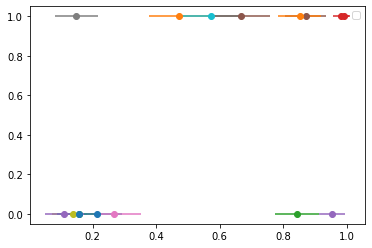

In [69]:
plt.errorbar(x=temp[0][1], y=0, xerr=temp[0][3], fmt='o')
plt.errorbar(x=temp[1][1], y=1, xerr=temp[1][3], fmt='o')
plt.errorbar(x=temp[2][1], y=0, xerr=temp[2][3], fmt='o')
plt.errorbar(x=temp[3][1], y=1, xerr=temp[3][3], fmt='o')
plt.errorbar(x=temp[4][1], y=0, xerr=temp[4][3], fmt='o')
plt.errorbar(x=temp[5][1], y=1, xerr=temp[5][3], fmt='o')
plt.errorbar(x=temp[6][1], y=0, xerr=temp[6][3], fmt='o')
plt.errorbar(x=temp[7][1], y=1, xerr=temp[7][3], fmt='o')
plt.errorbar(x=temp[8][1], y=0, xerr=temp[8][3], fmt='o')
plt.errorbar(x=temp[9][1], y=1, xerr=temp[9][3], fmt='o')
plt.errorbar(x=temp[10][1], y=0, xerr=temp[10][3], fmt='o')
plt.errorbar(x=temp[11][1], y=1, xerr=temp[11][3], fmt='o')
plt.errorbar(x=temp[12][1], y=0, xerr=temp[12][3], fmt='o')
plt.errorbar(x=temp[13][1], y=1, xerr=temp[13][3], fmt='o')
plt.errorbar(x=temp[14][1], y=0, xerr=temp[14][3], fmt='o')
plt.errorbar(x=temp[15][1], y=1, xerr=temp[15][3], fmt='o')
#plt.legend()
plt.show()

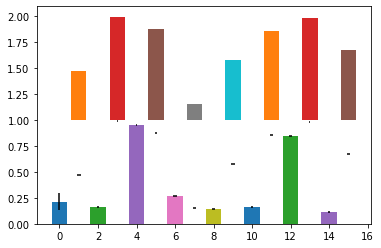

In [71]:
plt.bar(x=0, height=temp[0][1], yerr=temp[0][3])
plt.bar(x=1, height=temp[1][1], y=1, xerr=temp[1][3])
plt.bar(x=2, height=temp[2][1], y=0, xerr=temp[2][3])
plt.bar(x=3, height=temp[3][1], y=1, xerr=temp[3][3])
plt.bar(x=4, height=temp[4][1], y=0, xerr=temp[4][3])
plt.bar(x=5, height=temp[5][1], y=1, xerr=temp[5][3])
plt.bar(x=6, height=temp[6][1], y=0, xerr=temp[6][3])
plt.bar(x=7, height=temp[7][1], y=1, xerr=temp[7][3])
plt.bar(x=8, height=temp[8][1], y=0, xerr=temp[8][3])
plt.bar(x=9, height=temp[9][1], y=1, xerr=temp[9][3])
plt.bar(x=10, height=temp[10][1], y=0, xerr=temp[10][3])
plt.bar(x=11, height=temp[11][1], y=1, xerr=temp[11][3])
plt.bar(x=12, height=temp[12][1], y=0, xerr=temp[12][3])
plt.bar(x=13, height=temp[13][1], y=1, xerr=temp[13][3])
plt.bar(x=14, height=temp[14][1], y=0, xerr=temp[14][3])
plt.bar(x=15, height=temp[15][1], y=1, xerr=temp[15][3])

#legend

plt.show()